<a href="https://colab.research.google.com/github/ghgit1798/2021-financial-competition/blob/Guhyeon/%EC%8B%A0%ED%95%9C_%EC%A2%85%ED%95%A9%EC%9C%A0%ED%86%B5_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [50]:
sh = pd.read_csv('신한카드_전처리.csv', index_col=0, encoding='utf-8')

In [51]:
sh.columns

Index(['기준년월', '광역시도명', '업종대분류', '업종중분류', '업종소분류', '신규가맹점수', '해지가맹점수',
       '매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액'],
      dtype='object')

In [55]:
sh = sh[sh['업종대분류']=='종합유통']

In [56]:
group = sh.groupby(by='업종중분류').sum().reset_index()
n_cols = ['신규가맹점수','해지가맹점수','매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액']
group.drop(columns='기준년월', inplace=True)
group

,업종중분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,다단계판매,0,6,166,68535712000,415764,3440037895,9503086
1,마트/슈퍼마켓,951,1597,129394,3182073478000,128947589,30874076255,6425078
2,면세점,1,3,244,69964223000,637961,5498045789,10496464
3,백화점,16,13,1394,855398800000,11691087,34990277028,5589468
4,수입품,4,5,801,1311856000,22095,70468959,4027765
5,아울렛,2,3,392,309930292000,4999965,40272590748,4503586
6,온라인,577,60,13920,7597573667000,151774563,33520709158,7180724
7,전용매장,0,11,1891,58480890000,3784686,13266038688,5587615
8,편의점,3556,2547,190084,977499061000,143493925,317167177,521978


In [57]:
group = group[group['매출가맹점수']!=0]
group = group[group['카드매출건수']!=0]

In [58]:
# 점당매출금액, 건당매출금액 재계산
group['점당매출금액'] = group['카드매출금액']//group['매출가맹점수']
group['건당매출금액'] = group['카드매출금액']//group['카드매출건수']

In [59]:
# 표준화 수행
cls = group[n_cols]
scaler = MinMaxScaler()
scaler.fit(cls)
scaled = scaler.transform(cls)
scaled

array([[0.00000000e+00, 1.17924528e-03, 0.00000000e+00, 8.84959704e-03,
        2.59415221e-03, 5.21200992e-01, 1.00000000e+00],
       [2.67435321e-01, 6.26572327e-01, 6.80441032e-01, 4.18727224e-01,
        8.49577577e-01, 2.90929427e-02, 1.13048155e-01],
       [2.81214848e-04, 0.00000000e+00, 4.10703567e-04, 9.03765151e-03,
        4.05835904e-03, 3.61344212e-01, 6.50863760e-01],
       [4.49943757e-03, 3.93081761e-03, 6.46594846e-03, 1.12435164e-01,
        7.68949076e-02, 7.75653542e-01, 4.19882301e-01],
       [1.12485939e-03, 7.86163522e-04, 3.34354827e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.32601405e-01],
       [5.62429696e-04, 0.00000000e+00, 1.18998726e-03, 4.06276724e-02,
        3.28025637e-02, 1.00000000e+00, 3.49136240e-01],
       [1.62260967e-01, 2.24056604e-02, 7.24207289e-02, 1.00000000e+00,
        1.00000000e+00, 6.89688759e-01, 2.73656901e-01],
       [0.00000000e+00, 3.14465409e-03, 9.08286734e-03, 7.52594308e-03,
        2.47942656e-02, 3

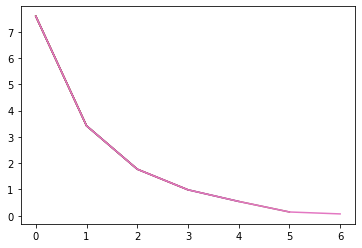

In [60]:
# screeplot 그리기
def elbow(x):
  sse = []

  for i in range(1, 8):
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
    plt.plot(sse)
  plt.show()

elbow(scaled)

In [61]:
# cluster 수는 3개로 결정
km = KMeans(n_clusters=3)
km.fit(scaled)
km.cluster_centers_

array([[0.00107799, 0.00150681, 0.00341551, 0.029746  , 0.02352404,
        0.44921988, 0.46785842],
       [0.63371766, 0.81328616, 0.84022052, 0.27361806, 0.89750542,
        0.01676744, 0.05652408],
       [0.16226097, 0.02240566, 0.07242073, 1.        , 1.        ,
        0.68968876, 0.2736569 ]])

In [62]:
cluster = pd.DataFrame(km.cluster_centers_, columns=cls.columns)
cluster.sort_values(by='카드매출금액', ascending=False, inplace=True)
cluster

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
2,0.162261,0.022406,0.072421,1.000000,1.000000,0.689689,0.273657
1,0.633718,0.813286,0.840221,0.273618,0.897505,0.016767,0.056524
0,0.001078,0.001507,0.003416,0.029746,0.023524,0.449220,0.467858


In [63]:
predict = pd.DataFrame(km.predict(scaled))
predict.columns = ['Cluster']
predict

,Cluster
0,0
1,1
2,0
3,0
4,0
5,0
6,2
7,0
8,1


In [64]:
scaled = pd.DataFrame(data=scaled, columns=cls.columns)
scaled

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,0.000000,0.001179,0.000000,0.008850,0.002594,0.521201,1.000000
1,0.267435,0.626572,0.680441,0.418727,0.849578,0.029093,0.113048
2,0.000281,0.000000,0.000411,0.009038,0.004058,0.361344,0.650864
3,0.004499,0.003931,0.006466,0.112435,0.076895,0.775654,0.419882
4,0.001125,0.000786,0.003344,0.000000,0.000000,0.000000,0.332601
5,0.000562,0.000000,0.001190,0.040628,0.032803,1.000000,0.349136
6,0.162261,0.022406,0.072421,1.000000,1.000000,0.689689,0.273657
7,0.000000,0.003145,0.009083,0.007526,0.024794,0.037121,0.054667
8,1.000000,1.000000,1.000000,0.128509,0.945433,0.004442,0.000000


In [67]:
names = pd.DataFrame(group['업종중분류'])
names.reset_index(inplace=True, drop=True)
names

,업종중분류
0,다단계판매
1,마트/슈퍼마켓
2,면세점
3,백화점
4,수입품
5,아울렛
6,온라인
7,전용매장
8,편의점


In [68]:
# names와 결합
result = pd.concat([scaled, names], axis=1)
result = pd.concat([result, predict], axis=1)
result

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,업종중분류,Cluster
0,0.000000,0.001179,0.000000,0.008850,0.002594,0.521201,1.000000,다단계판매,0
1,0.267435,0.626572,0.680441,0.418727,0.849578,0.029093,0.113048,마트/슈퍼마켓,1
2,0.000281,0.000000,0.000411,0.009038,0.004058,0.361344,0.650864,면세점,0
3,0.004499,0.003931,0.006466,0.112435,0.076895,0.775654,0.419882,백화점,0
4,0.001125,0.000786,0.003344,0.000000,0.000000,0.000000,0.332601,수입품,0
5,0.000562,0.000000,0.001190,0.040628,0.032803,1.000000,0.349136,아울렛,0
6,0.162261,0.022406,0.072421,1.000000,1.000000,0.689689,0.273657,온라인,2
7,0.000000,0.003145,0.009083,0.007526,0.024794,0.037121,0.054667,전용매장,0
8,1.000000,1.000000,1.000000,0.128509,0.945433,0.004442,0.000000,편의점,1


In [73]:
def show_cluster(result, name):
  categories = n_cols
  color = ['skyblue', 'blue', 'salmon', 'green']

  target = result[result['업종중분류']==name]

  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[0],
      theta = categories,
      fill='toself',
      name='필수산업',
      line_color=color[0]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[1],
      theta = categories,
      fill='toself',
      name='주류산업',
      line_color=color[1]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[2],
      theta = categories,
      fill='toself',
      name='비주류산업',
      line_color=color[2]
  ))

  fig.add_trace(go.Scatterpolar(
      r = target.values[0],
      theta = categories,
      fill='toself',
      name=name,
      line_color=color[3]
  ))

  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        title=str(target['Cluster']),
        visible=True,
      )),
  )
  print(target['Cluster'])
  fig.show()

# 클라우드 맥주 클러스터링 결과
show_cluster(result, '면세점')

2    0
Name: Cluster, dtype: int32
